In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Wiki-Vote.txt', sep='\t', skiprows=4, header=None, names=['source', 'target'])

In [3]:
df.head()

,source,target
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478


In [4]:
def count_nodes(vertex_list):
    node_freq = {}
    for node_id in vertex_list:
        if node_id in node_freq:
            node_freq[node_id] += 1
        else:
            node_freq[node_id] = 1
    return node_freq

In [5]:
def calculate_degree(vertex_list, check=None):
    node_freq = count_nodes(vertex_list)
    if not check:
        return sum(node_freq.values()) / len(node_freq)
    elif check == -1:
        return node_freq
    elif check == 1:
        return sorted(node_freq.items(), key=operator.itemgetter(1), reverse=True)[0][0]
    else:
        degree_freq = count_nodes(list(node_freq.values()))
        return degree_freq

In [7]:
# Calculate number of nodes and edges
nodes = set(df['source']) | set(df['target'])
num_nodes = len(nodes)
num_edges = len(df)

# Calculate max in-degree and max out-degree
in_degree = dict(df['target'].value_counts())
max_in_degree_node = max(in_degree, key=in_degree.get)
out_degree = dict(df['source'].value_counts())
max_out_degree_node = max(out_degree, key=out_degree.get)

# Calculate average in-degree and average out-degree
avg_in_degree = sum(in_degree.values()) / num_nodes
avg_out_degree = sum(out_degree.values()) / num_nodes

# Calculate density of the network
density = num_edges / (num_nodes * (num_nodes - 1))

# Printing the results
print("Attribute of the Wiki-Vote Network\t\tValue")
print("----------------------------------------------")
print(f"Total number of nodes in the network:\t{num_nodes}")
print(f"Total number of edges in the network:\t{num_edges}")
print(f"Node with maximum in-degree:\t\t{max_in_degree_node}")
print(f"Node with maximum out-degree:\t\t{max_out_degree_node}")
print(f"Average in-degree in the network:\t{avg_in_degree:.2f}")
print(f"Average out-degree in the network:\t{avg_out_degree:.2f}")
print(f"Density of the network:\t\t\t{density:.3f}")


Attribute of the Wiki-Vote Network		Value
----------------------------------------------
Total number of nodes in the network:	7115
Total number of edges in the network:	103689
Node with maximum in-degree:		4037
Node with maximum out-degree:		2565
Average in-degree in the network:	14.57
Average out-degree in the network:	14.57
Density of the network:			0.002


In [8]:
def create_edge_list(data):
    edge_list = []
    for i in range(len(data)):
        src = data.iloc[i, 0]
        dst = data.iloc[i, 1]
        edge_list.append((src, dst))
    return edge_list

In [9]:
edge_list = create_edge_list(df)

In [10]:
count = 1
print("Edge Representation of the Wiki-Vote Network (first 500 edges):",end="\n")
for edge in edge_list:
    print(f"{count} {edge}")
    if count == 500:
        break
    count+=1


Edge Representation of the Wiki-Vote Network (first 500 edges):
1 (30, 1412)
2 (30, 3352)
3 (30, 5254)
4 (30, 5543)
5 (30, 7478)
6 (3, 28)
7 (3, 30)
8 (3, 39)
9 (3, 54)
10 (3, 108)
11 (3, 152)
12 (3, 178)
13 (3, 182)
14 (3, 214)
15 (3, 271)
16 (3, 286)
17 (3, 300)
18 (3, 348)
19 (3, 349)
20 (3, 371)
21 (3, 567)
22 (3, 581)
23 (3, 584)
24 (3, 586)
25 (3, 590)
26 (3, 604)
27 (3, 611)
28 (3, 8283)
29 (25, 3)
30 (25, 6)
31 (25, 8)
32 (25, 19)
33 (25, 23)
34 (25, 28)
35 (25, 29)
36 (25, 30)
37 (25, 33)
38 (25, 35)
39 (25, 50)
40 (25, 54)
41 (25, 55)
42 (25, 75)
43 (25, 80)
44 (25, 86)
45 (25, 94)
46 (25, 127)
47 (25, 152)
48 (25, 154)
49 (25, 182)
50 (25, 192)
51 (25, 214)
52 (25, 224)
53 (25, 226)
54 (25, 246)
55 (25, 252)
56 (25, 255)
57 (25, 257)
58 (25, 261)
59 (25, 271)
60 (25, 273)
61 (25, 280)
62 (25, 282)
63 (25, 286)
64 (25, 299)
65 (25, 300)
66 (25, 302)
67 (25, 306)
68 (25, 308)
69 (25, 310)
70 (25, 322)
71 (25, 325)
72 (25, 339)
73 (25, 348)
74 (25, 349)
75 (25, 356)
76 (25, 358

#### Adjacency matrix

In [27]:
node_list = list(set(list(df['source']) + list(df['target'])))
adj_matrix = pd.DataFrame(index=node_list, columns=node_list)
adj_matrix = adj_matrix.fillna(0)

for edge in edge_list:
    adj_matrix[edge[0]][edge[1]] = 1

print("Adjacency Matrix")
display(adj_matrix)

Adjacency Matrix


,3,4,5,6,7,8,9,10,11,12,...,8288,8289,8290,8291,8292,8293,8294,8295,8296,8297
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import matplotlib.pyplot as plt

#### In-degree Distribution of Network

In [29]:
def plot_scatter(data,x_vals,y_vals,xlabel,title):
  plt.figure(figsize=[25,10])
  plt.scatter(list(data.keys()),list(data.values()))
  plt.title(title,fontsize=12)
  plt.xlabel(xlabel,fontsize=12)
  plt.xticks(x_vals,fontsize=12)
  plt.yticks(y_vals,fontsize=12)
  plt.ylabel("Number of Nodes of the network",fontsize=10)
  plt.grid()
  plt.show()

In [30]:
def create_spaced_values(total_count, step):
    return [i for i in range(1, total_count) if i % step == 0 or i == 1]

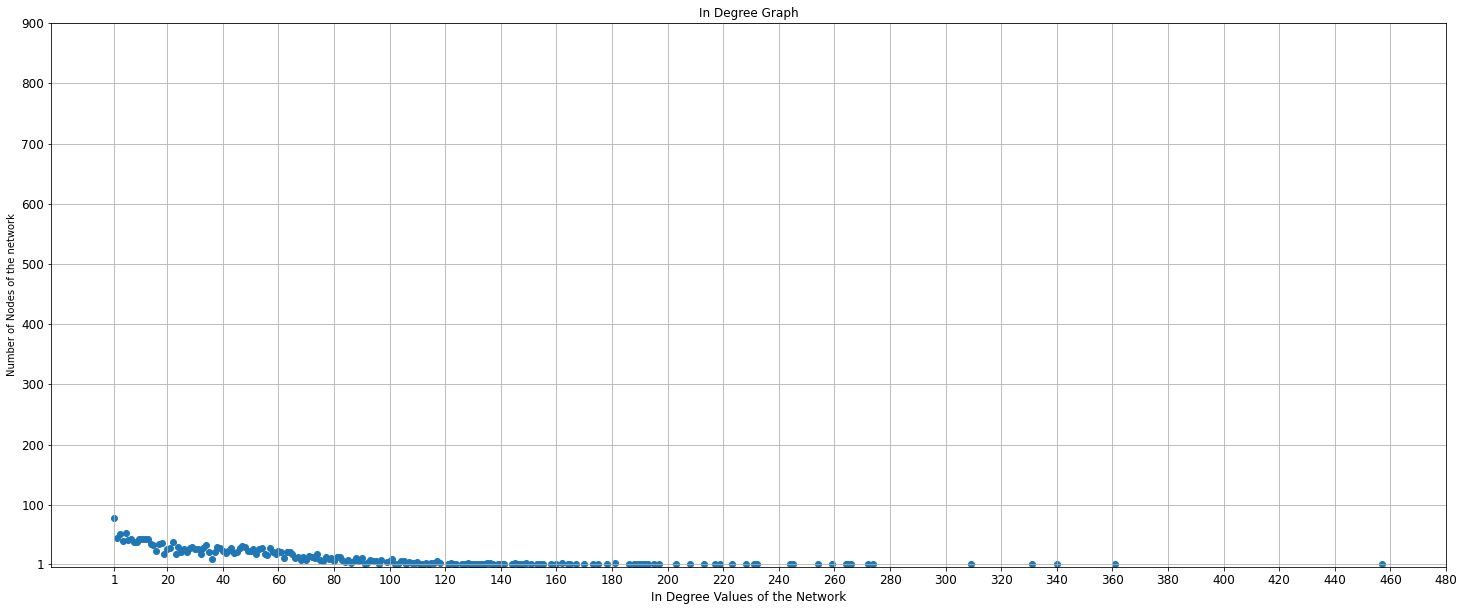

In [31]:
in_degree = calculate_degree(df['target'],2)
plot_scatter(in_degree,create_spaced_values(500, 20),create_spaced_values(1000, 100), "In Degree Values of the Network","In Degree Graph")

#### Out-degree Distribution of Netword

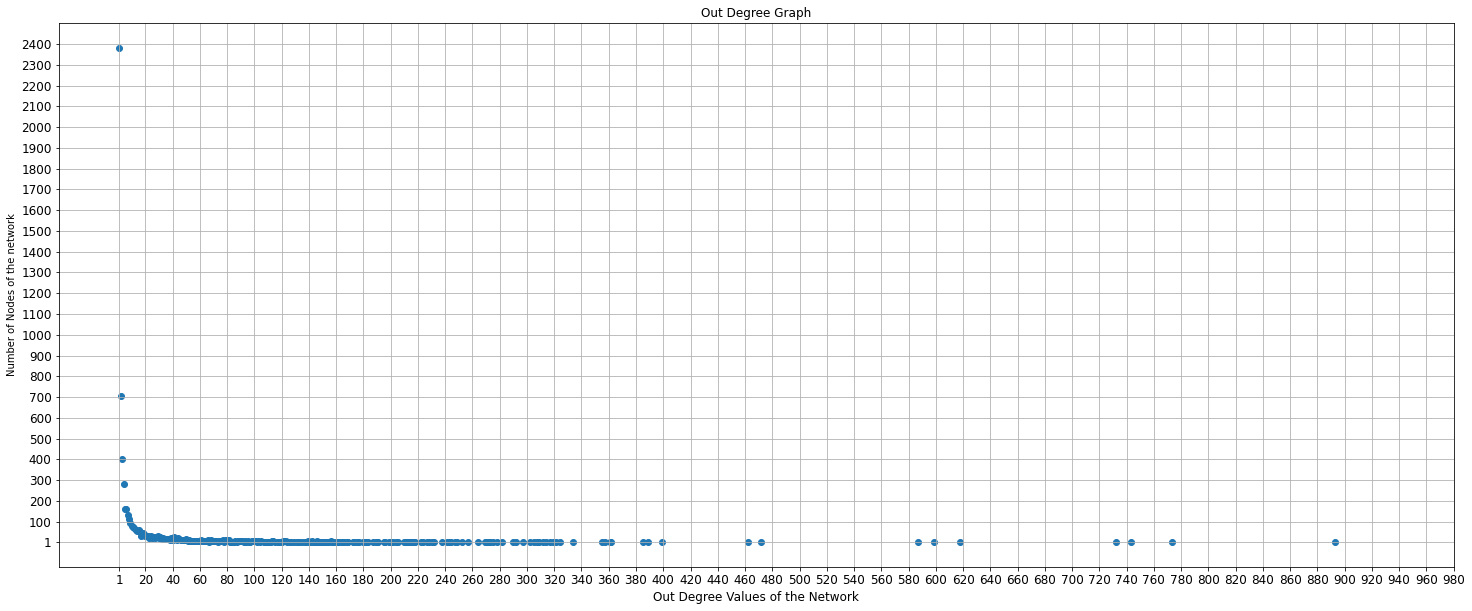

In [32]:
out_degree = calculate_degree(df['source'],2)
plot_scatter(out_degree, create_spaced_values(1000, 20), create_spaced_values(2500, 100), "Out Degree Values of the Network", "Out Degree Graph")

#### Clustering Coefficient Of Each Node of the Network

In [33]:
def find_neighbors(vertex, matrix):
    neighbors = []
    for j in vertex:
        if matrix[iterator][j]:
            neighbors.append(j)
    
    count_triangles = 0
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if matrix[neighbor1][neighbor2]:
                count_triangles += 1
    
    return neighbors, count_triangles

In [36]:
from prettytable import PrettyTable
import operator
from tqdm import tqdm

In [37]:
print("Clustering Coefficient Of Each Node of the Network\n")
vertex = list(set(list(df['source'])+list(df['target'])))
clust_coeff = {}
# for iterator in vertex:
for iterator in tqdm(vertex, leave=True, position=0):
  n1, find2 = find_neighbors(vertex, adj_matrix)
  try:
      clust_coeff[iterator] = (find2)/(len(n1)*(len(n1)-1))
  except:
      clust_coeff[iterator] = 0
t1 = PrettyTable(['Node Number','Clustering Coeffient Value of the Node'])
for i in dict(sorted(clust_coeff.items(),key=operator.itemgetter(1),reverse=True)):
    t1.add_row([i,clust_coeff[i]])
print(t1)

Clustering Coefficient Of Each Node of the Network



100%|██████████| 7115/7115 [13:36<00:00,  8.72it/s]  


+-------------+----------------------------------------+
| Node Number | Clustering Coeffient Value of the Node |
+-------------+----------------------------------------+
|     444     |                  1.0                   |
|     498     |                  1.0                   |
|     666     |                  1.0                   |
|     910     |                  1.0                   |
|     1199    |                  1.0                   |
|     1214    |                  1.0                   |
|     1444    |                  1.0                   |
|     1782    |                  1.0                   |
|     1923    |                  1.0                   |
|     1979    |                  1.0                   |
|     2293    |                  1.0                   |
|     3689    |                  1.0                   |
|     3809    |                  1.0                   |
|     3851    |                  1.0                   |
|     3999    |                

In [38]:
def count_clustering_coefficients(clust_coeff):
    count_zero, count_one = 0, 0 
    for i in clust_coeff:
        if clust_coeff[i] == 0:
            count_zero += 1
        if clust_coeff[i] == 1:
            count_one += 1
    return count_zero, count_one


In [39]:
uniqueCCV = list(set(clust_coeff.values()))

In [40]:
df = pd.DataFrame(columns = ['NodeNumber','CCValue'])

In [41]:
df['NodeNumber'] = clust_coeff.keys()
df['CCValue'] = clust_coeff.values()

In [42]:
x = list(df['NodeNumber'])
y = list(df['CCValue'])

In [43]:
l3 = df['CCValue'].value_counts()

In [44]:
df1 = pd.DataFrame(l3)

In [45]:
valuess = list(df1.index)
ccValues = list(df1.CCValue)

Text(0.5, 0, 'Clustering Coefficient Value of the nodes')

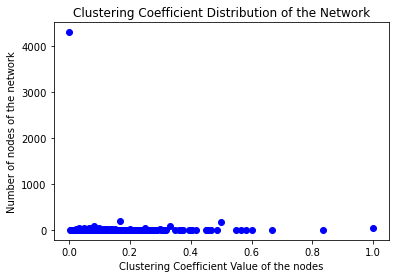

In [46]:
plt.scatter(valuess,ccValues,color='Blue')
plt.title('Clustering Coefficient Distribution of the Network')
plt.ylabel('Number of nodes of the network')
plt.xlabel('Clustering Coefficient Value of the nodes')

In [47]:
count0, count1 = count_clustering_coefficients(clust_coeff)
print("Number of Nodes having Clustering Coefficient Value 0 =", count0)
print("Number of Nodes having Clustering Coefficient Value 1 =", count1)
print("Final Clustering Coefficient of the Network =", sum(list(clust_coeff.values()))/len(vertex))


Number of Nodes having Clustering Coefficient Value 0 = 4297
Number of Nodes having Clustering Coefficient Value 1 = 45
Final Clustering Coefficient of the Network = 0.060885242517651504
